## Anne's comment:
Before you start implementing your approach, you should explore the data: E.g., How many instances of each type? How many tokens for a named entity (avg, std, min, max)? Etc. Maybe you can also find nice visualizations for your project report and presentation.

In [40]:
import numpy as np
import pandas as pd
import sys
from collections import Counter
import seaborn as sns
import matplotlib.pyplot as plt

/Users/MacBook/anaconda3/lib/python3.7/site-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [4]:
corpus = pd.read_csv('entity-annotated-corpus/ner_dataset.csv', sep=',', encoding= 'unicode_escape')
corpus.head()

,Sentence #,Word,POS,Tag
0,Sentence: 1,Thousands,NNS,O
1,NaN,of,IN,O
2,NaN,demonstrators,NNS,O
3,NaN,have,VBP,O
4,NaN,marched,VBN,O


In [8]:
print('Number of sentences in the corpus:')
print(corpus['Sentence #'].count())
print('\nNumber of words:')
print(corpus['Word'].count())

Number of sentences in the corpus:
47959

Number of words:
1048575


In [11]:
corpus.groupby('POS').count()['Tag']

POS
$         1149
,        32757
.        47831
:          795
;          214
CC       23716
CD       24695
DT       98454
EX         663
FW           1
IN      120996
JJ       78412
JJR       2967
JJS       3034
LRB        678
MD        6973
NN      145807
NNP     131426
NNPS      2521
NNS      75840
PDT        147
POS      11257
PRP      13318
PRP$      8655
RB       20252
RBR       1055
RBS        296
RP        2490
RRB        679
TO       23061
UH          24
VB       24211
VBD      39379
VBG      19125
VBN      32328
VBP      16158
VBZ      24960
WDT       3698
WP        2542
WP$         99
WRB       2184
``        3728
Name: Tag, dtype: int64

In [13]:
corpus.Tag.unique()

array(['O', 'B-geo', 'B-gpe', 'B-per', 'I-geo', 'B-org', 'I-org', 'B-tim',
       'B-art', 'I-art', 'I-per', 'I-gpe', 'I-tim', 'B-nat', 'B-eve',
       'I-eve', 'I-nat'], dtype=object)

In [45]:
corpus.groupby('Tag').count()['POS']

Tag
B-art       402
B-eve       308
B-geo     37644
B-gpe     15870
B-nat       201
B-org     20143
B-per     16990
B-tim     20333
I-art       297
I-eve       253
I-geo      7414
I-gpe       198
I-nat        51
I-org     16784
I-per     17251
I-tim      6528
O        887908
Name: POS, dtype: int64

In [46]:
tags = corpus['Tag']

tags_count = Counter(tags).most_common(10)
print(pd.DataFrame(tags_count))

       0       1
0      O  887908
1  B-geo   37644
2  B-tim   20333
3  B-org   20143
4  I-per   17251
5  B-per   16990
6  I-org   16784
7  B-gpe   15870
8  I-geo    7414
9  I-tim    6528


Text(0.5, 1.0, 'Most Common Tags in the Corpus')

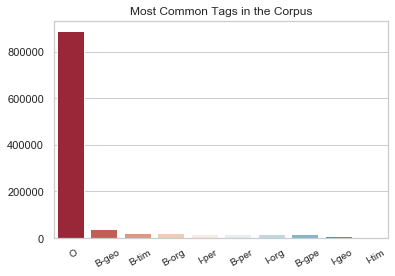

In [47]:
labels, values = zip(*tags_count)

indexes = np.arange(len(labels))
width = 1

sns.set(style = "whitegrid")

ax = sns.barplot(indexes, values, palette = "RdBu")

plt.xticks(indexes + width * 0.1, labels, rotation = 30)
plt.tick_params(axis = 'x', labelsize = 10)
plt.title("Most Common Tags in the Corpus")

Meaning that absolute majority = 887 908 out of 1 048 575 words (almost 85%) are marked as "O" - out of named entity
=> data is negatively unbalanced

## Attention: statistics above are not consistent with "Number of tagged entities" from the website (??)

In [31]:
np.set_printoptions(threshold=sys.maxsize)
print(corpus[corpus['Tag'] == 'B-per'].Word.unique())

['Bush' 'President' 'Thomas' 'Prophet' 'Omar' 'Khayam' 'Malik' 'Abdul'
 'Khan' 'Nancy-Amelia' 'Tim' 'Harcourt' 'Foreign' 'Mr.' 'Cholily'
 'Azahari' 'Pope' 'Sister' 'Byzantine' 'Ahmed' 'Qureia' 'Prime' 'Major'
 'General' 'Adam' 'Lieutenant' 'Tasnim' 'June' 'Amy' 'Vice' 'Nicole'
 'Dianne' 'Joel' 'Ritchie' 'Senator' 'Warner' 'Deputy' 'State' 'Nobutaka'
 'Li' 'Sam' 'Dharmeratnam' 'Saddam' 'Chairman' 'Tynychbek' 'Interior'
 'Defense' 'Liu' 'Joseph' 'Kony' 'Roger' 'Tommy' 'Haas' 'Federer' 'Kizza'
 'Dr.' 'John' 'Regina' 'Surgeon' 'Rachid' 'Ramda' 'Yu' 'Osama' 'Mike'
 'Admiral' 'Brigadier' 'Alberto' 'Wael' 'Information' 'Gene' 'Sperling'
 'Lawrence' 'Obama' 'Treasury' 'William' 'Rahm' 'Dragan' 'Radovan'
 'Philip' 'King' 'James' 'Abu' 'al-Baghdadi' 'Adnan' 'Moqtada' 'Ron'
 'Redmond' 'Hashem' 'Saadoun' 'Ibrahim' 'Zoba' 'Luis' 'Posada' 'Saud'
 'Agha' 'Fernando' 'Health' 'Jens' 'Wangari' 'al-Zarqawi' 'Mahmoud'
 'Barack' 'Ivanov' 'Silvio' 'Romano' 'Prodi' 'Moses' 'Shinzo' 'Stephen'
 'Obeidi' 'Marko

In [32]:
names = corpus[corpus['Tag'] == 'B-per'].Word
print(names)

42              Bush
270        President
331           Thomas
443        President
965          Prophet
             ...    
1048191     Richards
1048209     Richards
1048229     Minister
1048271         Khin
1048316         Khin
Name: Word, Length: 16990, dtype: object


In [39]:
names_count = Counter(names).most_common(10)
print(pd.DataFrame(names_count))

           0     1
0        Mr.  3085
1  President  2411
2      Prime   783
3   Minister   197
4        Ms.   176
5       John   160
6    General   139
7     Saddam   119
8  Secretary    98
9    Senator    93


Text(0.5, 1.0, 'Most Common Names in the Corpus')

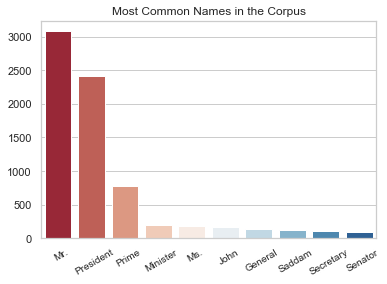

In [42]:
labels, values = zip(*names_count)

indexes = np.arange(len(labels))
width = 1

sns.set(style = "whitegrid")

ax = sns.barplot(indexes, values, palette = "RdBu")

plt.xticks(indexes + width * 0.1, labels, rotation = 30)
plt.tick_params(axis = 'x', labelsize = 10)
plt.title("Most Common Names in the Corpus")

Meaning that not only personal names, but also titles and positions are marked as "B-per"